In [1]:
%pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 13.3 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 19.3 MB/s eta 0:00:00
     --------------------------------------- 21.9/21.9 MB 17.7 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 17.4 MB/s eta 0:00:00
     --------------------------------------- 10.4/10.4 MB 22.6 MB/s eta 0:00:00
     ---------------------------------------- 60.0/60.0 kB ? eta 0:00:00
     ------------------------------------- 499.4/499.4 kB 15.3 MB/s eta 0:00:00
     --------------------------------------- 14.8/14.8 MB 20.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install matplotlib
%pip install keras

     ---------------------------------------- 7.6/7.6 MB 17.5 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 20.3 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB ? eta 0:00:00
     ---------------------------------------- 163.0/163.0 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 22.4 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 1.7/1.7 MB 9.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter("ignore")
plt.style.use("bmh")
from keras.metrics.metrics import mean_squared_error

In [5]:
df = pd.read_csv('myvalues.csv')

In [6]:
df.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind
0,Tropical Cyclone Dingani,2023-02-09T06:00:00Z,Point,89.1,-16.9,40.0
1,Tropical Cyclone Dingani,2023-02-09T12:00:00Z,Point,87.7,-16.6,40.0
2,Tropical Cyclone Dingani,2023-02-09T18:00:00Z,Point,86.3,-16.3,40.0
3,Tropical Cyclone Dingani,2023-02-10T00:00:00Z,Point,85.0,-16.2,45.0
4,Tropical Cyclone Dingani,2023-02-10T06:00:00Z,Point,83.6,-16.3,45.0


In [7]:
df['DateTime']=pd.to_datetime(df['DateTime'])

In [8]:
df['Date'] = df.DateTime.dt.date
df['Time'] = df.DateTime.dt.time

In [9]:
df["Date"] = df["Date"].astype("object")
for i, date_str in enumerate(df["Date"].unique()):
    df.loc[df["Date"]==date_str, "Date"] = f"{str(date_str)[0:4]}-{str(date_str)[4:6]}-{str(date_str)[6:]}"

In [10]:
print(f"Dataset contains data of {df['CycloneName'].unique().shape[0]} individual storms from {df['DateTime'].dt.year.min()} to {df['DateTime'].dt.year.max()}.")

Dataset contains data of 1 individual storms from 2023 to 2023.


In [11]:
def coordinate_mapping(x):
    coord = float(x[:-1])
    if x[-1]=="W":
        coord *= -1
    if x[-1]=="S":
        coord *= -1
    return coord

In [12]:
print("Min. Long.:", df.Longitude.min(), "Max. Long.:", df.Longitude.max(), "Min. Lat.:", df.Latitude.min(), "Max. Lat.:", df.Latitude.max())

Min. Long.: -31.0 Max. Long.: -15.5 Min. Lat.: 67.4 Max. Lat.: 89.1


In [13]:
df.loc[df.Longitude<-180, "Longitude"] = df.Longitude+360

In [14]:
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitude,df.Latitude), crs={'init' : 'epsg:4326'})

In [15]:
gdf.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [20]:
name = df['CycloneName']

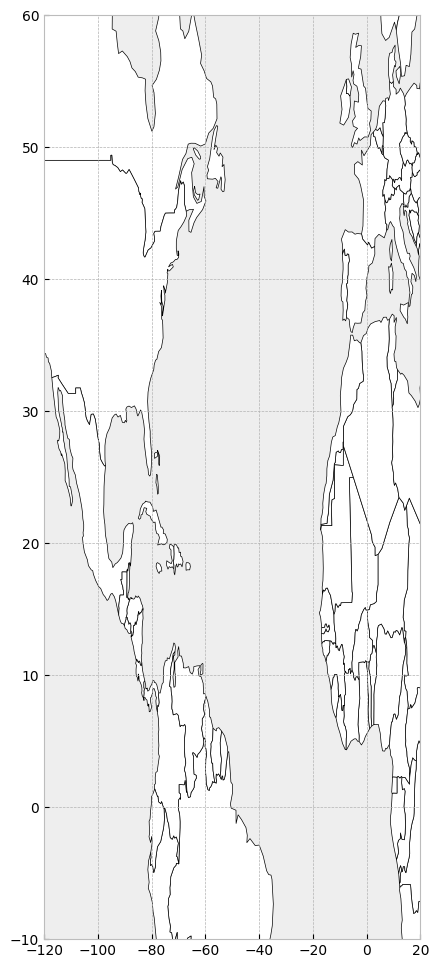

In [21]:
ax = world.plot(color="white", edgecolor="black", figsize=(25,12))
_ = gdf[gdf["CycloneName"]==name].plot(ax=ax, c="r", markersize="Maximum Wind", alpha=0.5)
_ = plt.xlim(-120, 20)
_ = plt.ylim(-10, 60)

In [ ]:
gdf.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry
0,Tropical Cyclone Cheneso,2023-01-17 18:00:00+00:00,Point,58.0,-14.1,35,2023--0-1-17,18:00:00,POINT (-14.10000 58.00000)
1,Tropical Cyclone Cheneso,2023-01-18 00:00:00+00:00,Point,56.2,-14.1,40,2023--0-1-18,00:00:00,POINT (-14.10000 56.20000)
2,Tropical Cyclone Cheneso,2023-01-18 06:00:00+00:00,Point,54.3,-13.8,40,2023--0-1-18,06:00:00,POINT (-13.80000 54.30000)
3,Tropical Cyclone Cheneso,2023-01-18 12:00:00+00:00,Point,52.6,-13.6,50,2023--0-1-18,12:00:00,POINT (-13.60000 52.60000)
4,Tropical Cyclone Cheneso,2023-01-18 18:00:00+00:00,Point,51.7,-13.5,55,2023--0-1-18,18:00:00,POINT (-13.50000 51.70000)


In [ ]:
lat_min = gdf.Latitude.min()
long_min = gdf.Longitude.min()
gdf["x"] = gdf.Latitude-lat_min
gdf["x"] = gdf["x"]/gdf["x"].max()
gdf["y"] = gdf.Longitude-long_min
gdf["y"] = gdf["y"]/gdf["y"].max()

In [ ]:
gdf.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry,x,y
0,Tropical Cyclone Cheneso,2023-01-17 18:00:00+00:00,Point,58.0,-14.1,35,2023--0-1-17,18:00:00,POINT (-14.10000 58.00000),1.000000,0.968912
1,Tropical Cyclone Cheneso,2023-01-18 00:00:00+00:00,Point,56.2,-14.1,40,2023--0-1-18,00:00:00,POINT (-14.10000 56.20000),0.892216,0.968912
2,Tropical Cyclone Cheneso,2023-01-18 06:00:00+00:00,Point,54.3,-13.8,40,2023--0-1-18,06:00:00,POINT (-13.80000 54.30000),0.778443,0.984456
3,Tropical Cyclone Cheneso,2023-01-18 12:00:00+00:00,Point,52.6,-13.6,50,2023--0-1-18,12:00:00,POINT (-13.60000 52.60000),0.676647,0.994819
4,Tropical Cyclone Cheneso,2023-01-18 18:00:00+00:00,Point,51.7,-13.5,55,2023--0-1-18,18:00:00,POINT (-13.50000 51.70000),0.622754,1.000000


In [ ]:
gdf["relative_time"] = ((gdf.DateTime.dt.dayofyear+(gdf.DateTime.dt.hour/24.)+(gdf.DateTime.dt.minute/60.*24))/366.)

In [ ]:
gdf["month"] = gdf.DateTime.dt.month
gdf["hour"] = gdf.DateTime.dt.hour

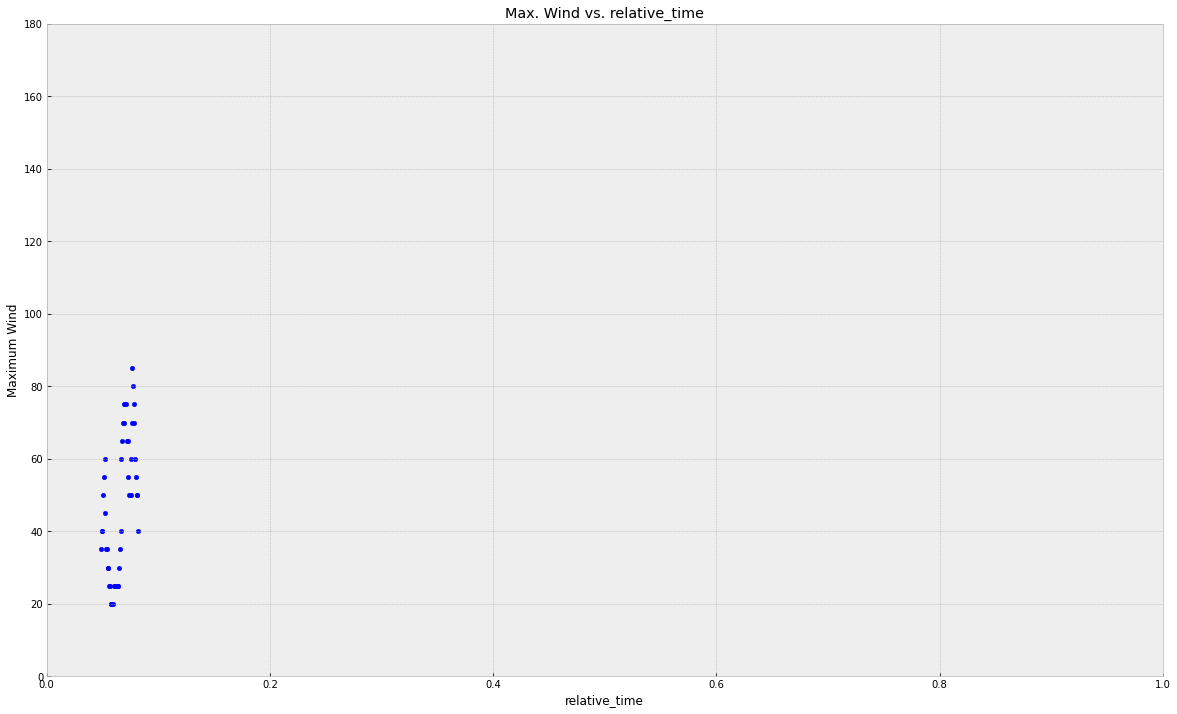

In [ ]:
_ = gdf.plot(x="relative_time", y="Maximum Wind", kind="scatter", figsize=(20,12), title="Max. Wind vs. relative_time")
_ = plt.ylim(0,180)
_ = plt.xlim(0,1)

In [ ]:
df.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry
0,Tropical Cyclone Cheneso,2023-01-17 18:00:00+00:00,Point,58.0,-14.1,35,2023--0-1-17,18:00:00,POINT (-14.10000 58.00000)
1,Tropical Cyclone Cheneso,2023-01-18 00:00:00+00:00,Point,56.2,-14.1,40,2023--0-1-18,00:00:00,POINT (-14.10000 56.20000)
2,Tropical Cyclone Cheneso,2023-01-18 06:00:00+00:00,Point,54.3,-13.8,40,2023--0-1-18,06:00:00,POINT (-13.80000 54.30000)
3,Tropical Cyclone Cheneso,2023-01-18 12:00:00+00:00,Point,52.6,-13.6,50,2023--0-1-18,12:00:00,POINT (-13.60000 52.60000)
4,Tropical Cyclone Cheneso,2023-01-18 18:00:00+00:00,Point,51.7,-13.5,55,2023--0-1-18,18:00:00,POINT (-13.50000 51.70000)


In [ ]:
gdf["vec_x"] = np.nan
gdf["vec_y"] = np.nan
vecs = {"x": [], "y": [], "id": []}
for storm_id in gdf["CycloneName"].unique():
    last_x = 0
    last_y = 0
    for i, row in gdf[gdf["CycloneName"]==storm_id].iterrows():
        if last_x==0:
            last_x = row.x
            last_y = row.y
        else:
            vec_x = row.x-last_x
            vec_y = row.y-last_y
            vecs["x"].append(vec_x)
            vecs["y"].append(vec_y)
            vecs["id"].append(i)
            last_x = row.x
            last_y = row.y
gdf.loc[vecs["id"], "vec_x"] = vecs["x"]
gdf.loc[vecs["id"], "vec_y"] = vecs["y"]

In [ ]:
gdf.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry,x,y,relative_time,month,hour,vec_x,vec_y
0,Tropical Cyclone Cheneso,2023-01-17 18:00:00+00:00,Point,58.0,-14.1,35,2023--0-1-17,18:00:00,POINT (-14.10000 58.00000),1.000000,0.968912,0.048497,1,18,NaN,NaN
1,Tropical Cyclone Cheneso,2023-01-18 00:00:00+00:00,Point,56.2,-14.1,40,2023--0-1-18,00:00:00,POINT (-14.10000 56.20000),0.892216,0.968912,0.049180,1,0,-0.107784,0.000000
2,Tropical Cyclone Cheneso,2023-01-18 06:00:00+00:00,Point,54.3,-13.8,40,2023--0-1-18,06:00:00,POINT (-13.80000 54.30000),0.778443,0.984456,0.049863,1,6,-0.113772,0.015544
3,Tropical Cyclone Cheneso,2023-01-18 12:00:00+00:00,Point,52.6,-13.6,50,2023--0-1-18,12:00:00,POINT (-13.60000 52.60000),0.676647,0.994819,0.050546,1,12,-0.101796,0.010363
4,Tropical Cyclone Cheneso,2023-01-18 18:00:00+00:00,Point,51.7,-13.5,55,2023--0-1-18,18:00:00,POINT (-13.50000 51.70000),0.622754,1.000000,0.051230,1,18,-0.053892,0.005181


In [ ]:
gdf["vec_len"] = np.sqrt((gdf["vec_x"]**2)+(gdf["vec_y"]**2))

In [ ]:
def calculate_direction(vec_x, vec_y):
    def vec_angle(a, b):
        return np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))
    ref_vec = np.array([vec_x, vec_y])
    N_vec = np.array([0,1])
    S_vec = np.array([0,-1])
    E_vec = np.array([1,0])
    W_vec = np.array([-1,0])
    N_angle = vec_angle(ref_vec, N_vec)
    E_angle = vec_angle(ref_vec, E_vec)
    W_angle = vec_angle(ref_vec, W_vec)
    return_angle = N_angle
    if W_angle<E_angle:
        return_angle = 2*np.pi-return_angle
    return return_angle

In [ ]:
gdf["vec_direction"] = gdf.apply(lambda x: calculate_direction(x.vec_x, x.vec_y), axis=1)

In [ ]:
gdf["tdelta"] = np.nan
tdeltas = {"t": [], "id": []}
for storm_id in gdf["CycloneName"].unique():
    last_time = 0
    for i, row in gdf[gdf["CycloneName"]==storm_id].iterrows():
        if last_time==0:
            last_time = row.DateTime
        else:
            tdeltas["t"].append((row.DateTime-last_time).seconds)
            tdeltas["id"].append(i)
            last_time = row.DateTime
gdf.loc[tdeltas["id"], "tdelta"] = tdeltas["t"]

In [ ]:
gdf.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry,x,y,relative_time,month,hour,vec_x,vec_y,vec_len,vec_direction,tdelta
0,Tropical Cyclone Cheneso,2023-01-17 18:00:00+00:00,Point,58.0,-14.1,35,2023--0-1-17,18:00:00,POINT (-14.10000 58.00000),1.000000,0.968912,0.048497,1,18,NaN,NaN,NaN,NaN,NaN
1,Tropical Cyclone Cheneso,2023-01-18 00:00:00+00:00,Point,56.2,-14.1,40,2023--0-1-18,00:00:00,POINT (-14.10000 56.20000),0.892216,0.968912,0.049180,1,0,-0.107784,0.000000,0.107784,4.712389,21600.0
2,Tropical Cyclone Cheneso,2023-01-18 06:00:00+00:00,Point,54.3,-13.8,40,2023--0-1-18,06:00:00,POINT (-13.80000 54.30000),0.778443,0.984456,0.049863,1,6,-0.113772,0.015544,0.114829,4.848172,21600.0
3,Tropical Cyclone Cheneso,2023-01-18 12:00:00+00:00,Point,52.6,-13.6,50,2023--0-1-18,12:00:00,POINT (-13.60000 52.60000),0.676647,0.994819,0.050546,1,12,-0.101796,0.010363,0.102322,4.813838,21600.0
4,Tropical Cyclone Cheneso,2023-01-18 18:00:00+00:00,Point,51.7,-13.5,55,2023--0-1-18,18:00:00,POINT (-13.50000 51.70000),0.622754,1.000000,0.051230,1,18,-0.053892,0.005181,0.054141,4.808237,21600.0


In [ ]:
gdf = gdf[gdf["tdelta"]==21600]
gdf.shape

(47, 19)

In [ ]:
gdf["prev_len"] = np.nan
gdf["prev_direction"] = np.nan
prevs = {"len": [], "direction": [], "id": []}
for storm_id in gdf["CycloneName"].unique():
    last_len = False
    last_direction = False
    for i, row in gdf[gdf["CycloneName"]==storm_id].iterrows():
        if last_len==False:
            last_len = row.vec_len
            last_direction = row.vec_direction
        else:
            prevs["len"].append(last_len)
            prevs["direction"].append(last_direction)
            prevs["id"].append(i)
            last_len = row.vec_len
            last_direction = row.vec_direction
gdf.loc[prevs["id"], "prev_len"] = prevs["len"]
gdf.loc[prevs["id"], "prev_direction"] = prevs["direction"]

In [ ]:
gdf.dropna(how="any", inplace=True)
gdf.shape

(44, 21)

Prediction

In [ ]:
gdf_prediction_direction = gdf[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction", "vec_direction"]]
gdf_prediction_length = gdf[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction","vec_len"]]
X_direction = gdf_prediction_direction.values[:,:-1]
y_direction = gdf_prediction_direction.values[:,-1]
X_length = gdf_prediction_length.values[:,:-1]
y_length = gdf_prediction_length.values[:,-1]

In [ ]:
gdf.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry,x,...,relative_time,month,hour,vec_x,vec_y,vec_len,vec_direction,tdelta,prev_len,prev_direction
2,Tropical Cyclone Cheneso,2023-01-18 06:00:00+00:00,Point,54.3,-13.8,40,2023--0-1-18,06:00:00,POINT (-13.80000 54.30000),0.778443,...,0.049863,1,6,-0.113772,0.015544,0.114829,4.848172,21600.0,0.107784,4.712389
3,Tropical Cyclone Cheneso,2023-01-18 12:00:00+00:00,Point,52.6,-13.6,50,2023--0-1-18,12:00:00,POINT (-13.60000 52.60000),0.676647,...,0.050546,1,12,-0.101796,0.010363,0.102322,4.813838,21600.0,0.114829,4.848172
4,Tropical Cyclone Cheneso,2023-01-18 18:00:00+00:00,Point,51.7,-13.5,55,2023--0-1-18,18:00:00,POINT (-13.50000 51.70000),0.622754,...,0.051230,1,18,-0.053892,0.005181,0.054141,4.808237,21600.0,0.102322,4.813838
5,Tropical Cyclone Cheneso,2023-01-19 00:00:00+00:00,Point,50.9,-14.0,60,2023--0-1-19,00:00:00,POINT (-14.00000 50.90000),0.574850,...,0.051913,1,0,-0.047904,-0.025907,0.054461,4.216634,21600.0,0.054141,4.808237
6,Tropical Cyclone Cheneso,2023-01-19 06:00:00+00:00,Point,49.9,-14.0,45,2023--0-1-19,06:00:00,POINT (-14.00000 49.90000),0.514970,...,0.052596,1,6,-0.059880,0.000000,0.059880,4.712389,21600.0,0.054461,4.216634


In [ ]:
from sklearn.model_selection import train_test_split
X_direction_train, X_direction_test, y_direction_train, y_direction_test = train_test_split(X_direction, y_direction, test_size=0.2, random_state=42)
X_length_train, X_length_test, y_length_train, y_length_test = train_test_split(X_length, y_length, test_size=0.2, random_state=42)

In [ ]:
print(X_direction.shape)
print(y_direction.shape)
print(X_length.shape)
print(y_length.shape)

(44, 7)
(44,)
(44, 7)
(44,)


LSTM


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM
import math, time
from geopy.distance import great_circle as vc
import math as Math
from keras.models import model_from_json

In [ ]:
# Define the number of inputs, hidden units, and outputs
n_inputs = X_direction_train.shape[1]
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25
n_outputs = 1

# Create the LSTM model
model = Sequential()
model.add(LSTM(n_hidden1, input_shape=(n_inputs, 1), return_sequences=True))
model.add(LSTM(n_hidden2, return_sequences=True))
model.add(LSTM(n_hidden3))
model.add(Dense(n_outputs))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_direction_train, y_direction_train, epochs=100, batch_size=64)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 14.0228
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 12.9148
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 11.8849
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 10.9117
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 9.9782
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 9.0689
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 8.1756
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 7.2982
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 6.4435
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 5.6243
Epoch 11/100
1/1 [==============================] - 0s 19ms/step - loss: 4.8574
Epoch 12/100
1/1 [==============================] - 0s 20ms/step - loss: 4.1615
Epoch 13/100
1/1 [=============================

In [ ]:
model1 = Sequential()
model1.add(LSTM(n_hidden1, input_shape=(n_inputs, 1), return_sequences=True))
model1.add(LSTM(n_hidden2, return_sequences=True))
model1.add(LSTM(n_hidden3))
model1.add(Dense(n_outputs))

# Compile the model
model1.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model1.fit(X_length_train, y_length_train, epochs=100, batch_size=64)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.0301
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 0.0023
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0163
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0145
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0058
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0018
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0035
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0064
Epoch 9/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0073
Epoch 10/100
1/1 [==============================] - 0s 37ms/step - loss: 0.0059
Epoch 11/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0037
Epoch 12/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0020
Epoch 13/100
1/1 [==============================] -

In [ ]:
Y_test_predicted_lstm_direction = model.predict(X_direction_test)
# print(Y_test_predicted_lstm_direction)
Y_test_predicted_lstm_length = model1.predict(X_length_test)
# print(Y_test_predicted_lstm_length)
predicted = np.dstack((Y_test_predicted_lstm_direction,Y_test_predicted_lstm_length))
print(predicted)

1/1 [==============================] - 2s 2s/step
[[[3.4358263  0.05398309]]

 [[3.4246497  0.05182162]]

 [[3.4299345  0.05199566]]

 [[3.436782   0.0549386 ]]

 [[3.4201987  0.05793467]]

 [[3.4244108  0.05305706]]

 [[3.438556   0.05467736]]

 [[3.445035   0.0370539 ]]

 [[3.4450085  0.05053993]]]


In [ ]:
errorlstm = mean_squared_error(y_direction_test,Y_test_predicted_lstm_direction[:,0])
print(errorlstm)
lstm = [Y_test_predicted_lstm_direction,Y_test_predicted_lstm_length,errorlstm]

0.7385692850954713


In [ ]:
mean_squared_error(y_length_test,Y_test_predicted_lstm_length[:,0])

0.0008460121448754676

MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=100,learning_rate_init=0.1,max_iter=300,verbose=True)
mlp1 = MLPRegressor(hidden_layer_sizes=100,learning_rate_init=0.1,max_iter=300,verbose=True)

In [ ]:
model_direction_mlp = mlp.fit(X_direction_train, y_direction_train)

Iteration 1, loss = 44.25508532
Iteration 2, loss = 1928.65352567
Iteration 3, loss = 150.98800688
Iteration 4, loss = 73.45622949
Iteration 5, loss = 169.43475614
Iteration 6, loss = 43.20275989
Iteration 7, loss = 57.26868401
Iteration 8, loss = 62.14856074
Iteration 9, loss = 4.70799364
Iteration 10, loss = 13.05576246
Iteration 11, loss = 32.28816036
Iteration 12, loss = 28.45385042
Iteration 13, loss = 11.94169780
Iteration 14, loss = 1.76554913
Iteration 15, loss = 6.11734109
Iteration 16, loss = 15.43897032
Iteration 17, loss = 15.60195831
Iteration 18, loss = 7.99684632
Iteration 19, loss = 2.40365214
Iteration 20, loss = 2.38735271
Iteration 21, loss = 5.26179434
Iteration 22, loss = 7.65633695
Iteration 23, loss = 8.15511446
Iteration 24, loss = 6.93009795
Iteration 25, loss = 4.87398279
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [ ]:
model_length_mlp = mlp1.fit(X_length_train, y_length_train)

Iteration 1, loss = 30.13836474
Iteration 2, loss = 1427.35668303
Iteration 3, loss = 119.16046813
Iteration 4, loss = 40.07622132
Iteration 5, loss = 92.86624949
Iteration 6, loss = 8.09361847
Iteration 7, loss = 124.63794658
Iteration 8, loss = 18.75989204
Iteration 9, loss = 18.97816413
Iteration 10, loss = 63.43016165
Iteration 11, loss = 45.25117112
Iteration 12, loss = 7.21580300
Iteration 13, loss = 4.25602780
Iteration 14, loss = 27.26826200
Iteration 15, loss = 29.36024504
Iteration 16, loss = 11.28912083
Iteration 17, loss = 0.43480295
Iteration 18, loss = 2.61218034
Iteration 19, loss = 8.69636855
Iteration 20, loss = 11.49965495
Iteration 21, loss = 9.87400603
Iteration 22, loss = 6.01334089
Iteration 23, loss = 2.39930592
Iteration 24, loss = 0.37338951
Iteration 25, loss = 0.09866783
Iteration 26, loss = 0.99277477
Iteration 27, loss = 2.21562945
Iteration 28, loss = 3.07062451
Iteration 29, loss = 3.24100113
Iteration 30, loss = 2.80110959
Iteration 31, loss = 2.04457189

In [ ]:
Y_test_predicted_mlp_direction = mlp.predict(X_direction_test)
Y_test_predicted_mlp_length = mlp1.predict(X_length_test)

In [ ]:
errormlp = mean_squared_error(y_direction_test,Y_test_predicted_mlp_direction)
print(errormlp)
svr = [Y_test_predicted_mlp_direction,Y_test_predicted_mlp_length,errormlp]

4.157331414652099


In [ ]:
mean_squared_error(y_length_test,Y_test_predicted_mlp_length)

<tf.Tensor: shape=(), dtype=float64, numpy=0.26290030091485944>

GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
model_direction = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0, loss='ls').fit(X_direction_train, y_direction_train)
errorgrad = mean_squared_error(y_direction_test, model_direction.predict(X_direction_test))
print(errorgrad)

0.6953821884323592


In [ ]:
model_length = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0, loss='ls').fit(X_length_train, y_length_train)
mean_squared_error(y_length_test, model_length.predict(X_length_test))
grad = [model_direction,model_length,errorgrad]

SVR

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=1.0,epsilon=0.1,degree=3)
svr1 = SVR(kernel='rbf',C=1.0,epsilon=0.1,degree=3)

In [ ]:
model_direction_svr = svr.fit(X_direction_train, y_direction_train)
model_length_svr = svr1.fit(X_length_train, y_length_train)

In [ ]:
Y_test_direction_predicted_svr = model_direction_svr.predict(X_direction_test)
Y_test_length_predicted_svr = model_length_svr.predict(X_length_test)

In [ ]:
errorsvr = mean_squared_error(y_direction_test,Y_test_direction_predicted_svr)
print(errorsvr)
svr = [Y_test_direction_predicted_svr,Y_test_length_predicted_svr,errorsvr]

0.6994573790852603


In [ ]:
mean_squared_error(y_length_test,Y_test_length_predicted_svr)

0.002666187337117972

LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
lin_reg1 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

In [ ]:
model_direction_lr = lin_reg.fit(X_direction_train, y_direction_train)
model_length_lr = lin_reg1.fit(X_length_test,y_length_test)

In [ ]:
Y_test_direction_predicted_lr = model_direction_lr.predict(X_direction_test)
Y_test_length_predicted_lr = model_length_lr.predict(X_length_test)

In [ ]:
errorlr = mean_squared_error(y_direction_test,Y_test_direction_predicted_lr)
print(errorlr)
lr = [Y_test_direction_predicted_lr,Y_test_length_predicted_lr,errorlr]

0.7218825559997097


In [ ]:
mean_squared_error(y_length_test,Y_test_length_predicted_lr)

9.804575451943719e-05

In [ ]:
predvals = [errorlstm,errormlp,errorgrad,errorsvr,errorlr]
print(predvals)

minerror = min(predvals)
print(minerror)

[0.7385692850954713, 4.157331414652099, 0.6953821884323592, 0.6994573790852603, 0.7218825559997097]
0.6953821884323592


In [ ]:
if minerror==errorlstm:
  model_direction = lstm[0]
  model_length = lstm[1]
elif minerror==errormlp:
  model_direction = mlp[0]
  model_length = mlp[1]
elif minerror==errorsvr:
  model_direction = svr[0]
  model_length = svr[1]
elif minerror==errorlr:
  model_direction = lr[0]
  model_length = lr[1]

In [ ]:
lat_min = df.Latitude.min()
long_min = df.Longitude.min()
temp_x = df.Latitude-lat_min
temp_y = df.Longitude-long_min
x_max = temp_x.max()
y_max = temp_y.max()

def coords_to_latlong(x, y, lat_min, long_min, x_max, y_max):
    return (x*x_max)+lat_min, (y*y_max)+long_min

In [ ]:
gdf_pred = gdf[["Latitude", "Longitude", "Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction", "vec_len", "vec_direction"]][gdf.CycloneName=='Tropical Cyclone Cheneso']
X_pred_direction = gdf_pred[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values
X_pred_len = gdf_pred[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

In [ ]:
df_pred = pd.DataFrame({"pred_len": model_length.predict(X_pred_len), "pred_direction": model_direction.predict(X_pred_direction)})

In [ ]:
df_pred["pred_x"] = np.nan
df_pred["pred_y"] = np.nan
df_pred["real_x"] = gdf_pred["x"].iloc[1:].values
df_pred["real_y"] = gdf_pred["y"].iloc[1:].values

In [ ]:
last_x = gdf_pred["x"].iloc[0]
last_y = gdf_pred["y"].iloc[0]
coords = {"x": [], "y": [], "id": []}
for i, row in df_pred.iterrows():
    vector = np.array([0,1])
    R = np.array([[np.cos(row.pred_direction), -np.sin(row.pred_direction)], [np.sin(row.pred_direction), np.cos(row.pred_direction)]])
    vector = np.matmul(vector, R)
    vector = vector/np.linalg.norm(vector)
    vector *= row.pred_len
    coords["x"].append(last_x+vector[0])
    coords["y"].append(last_y+vector[1])
    coords["id"].append(i)
    last_x = row.real_x
    last_y = row.real_y
df_pred.loc[coords["id"], "pred_x"] = coords["x"]
df_pred.loc[coords["id"], "pred_y"] = coords["y"]

In [ ]:
df_pred["pred_Longitude"] = np.nan
df_pred["real_Longitude"] = np.nan
df_pred["pred_Latitude"] = np.nan
df_pred["real_Latitude"] = np.nan
latslongs = {"pred_Longitude": [], "real_Longitude": [], "pred_Latitude": [], "real_Latitude": [], "id": []}
for i, row in df_pred.iterrows():
    real_Latitude, real_Longitude = coords_to_latlong(row.real_x, row.real_y, lat_min, long_min, x_max, y_max)
    latslongs["real_Latitude"].append(real_Latitude)
    latslongs["real_Longitude"].append(real_Longitude)
    pred_Latitude, pred_Longitude = coords_to_latlong(row.pred_x, row.pred_y, lat_min, long_min, x_max, y_max)
    latslongs["pred_Latitude"].append(pred_Latitude)
    latslongs["pred_Longitude"].append(pred_Longitude)
    latslongs["id"].append(i)
df_pred.loc[latslongs["id"], "real_Latitude"] = latslongs["real_Latitude"]
df_pred.loc[latslongs["id"], "real_Longitude"] = latslongs["real_Longitude"]
df_pred.loc[latslongs["id"], "pred_Latitude"] = latslongs["pred_Latitude"]
df_pred.loc[latslongs["id"], "pred_Longitude"] = latslongs["pred_Longitude"]

In [ ]:
gdf_real = gpd.GeoDataFrame(df_pred,geometry=gpd.points_from_xy(df_pred.real_Longitude,df_pred.real_Latitude), crs={'init' :'epsg:4326'})
gdf_pred = gpd.GeoDataFrame(df_pred,geometry=gpd.points_from_xy(df_pred.pred_Longitude,df_pred.pred_Latitude), crs={'init' :'epsg:4326'})

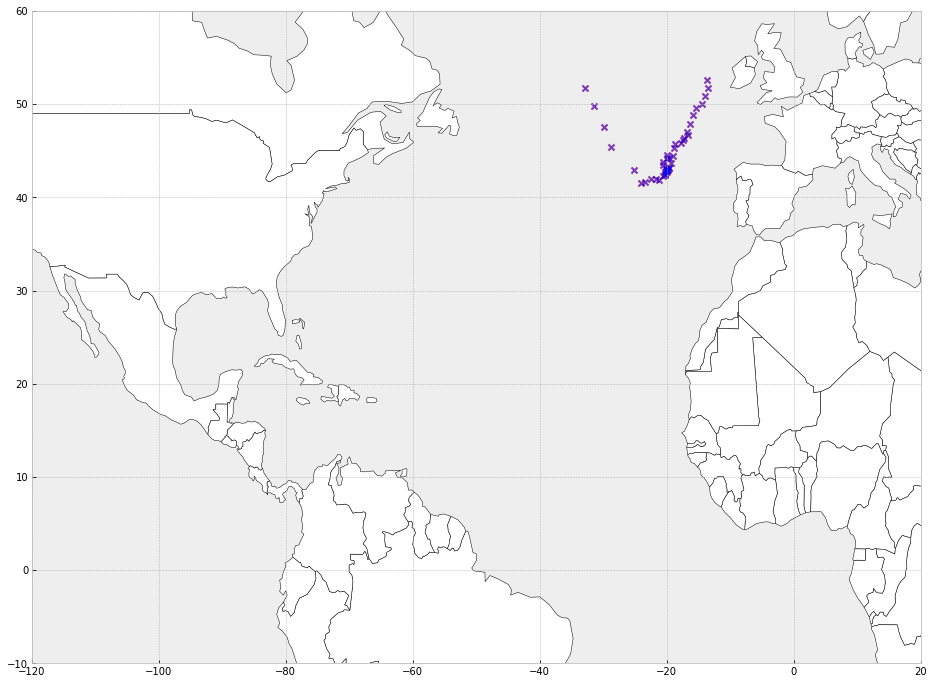

In [ ]:
ax = world.plot(color="white", edgecolor="black", figsize=(25,12))
_ = gdf_real.plot(ax=ax, c="r", marker="x", alpha=0.5)
_ = gdf_pred.plot(ax=ax, c="b", marker="x", alpha=0.5)
_ = plt.xlim(-120, 20)
_ = plt.ylim(-10, 60)